In [126]:
%matplotlib inline
import numpy as np
import pandas as pd
import pyflux as pf
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sm
import statsmodels.tsa.api as smt
import scipy.stats as sp
from sklearn.metrics import mean_squared_error as mse


In [70]:
msft = pd.DataFrame.from_csv('MSFT.csv')
msft = msft.fillna(msft.mean())
msft.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-09-15,56.15,57.350,55.98,57.19,26435104.0,0.0,1.0,56.15,57.350,55.98,57.19,26435104.0
2016-09-14,56.39,56.630,56.03,56.26,23616182.0,0.0,1.0,56.39,56.630,56.03,56.26,23616182.0
2016-09-13,56.50,56.650,56.05,56.53,29465088.0,0.0,1.0,56.50,56.650,56.05,56.53,29465088.0
2016-09-12,56.00,57.205,55.61,57.05,28441578.0,0.0,1.0,56.00,57.205,55.61,57.05,28441578.0
2016-09-09,56.79,57.520,56.21,56.21,33475922.0,0.0,1.0,56.79,57.520,56.21,56.21,33475922.0


In [71]:
yr2000=pd.date_range('2000-01-01','2001-01-01', freq='D')
msft2000 = msft.loc[yr2000].dropna()
op = msft2000.Open
high = msft2000.High
low = msft2000.Low
close = msft2000.Close
msft2000.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
2000-01-03,117.38,118.62,112.00,116.56,26614200.0,0.0,1.0,40.426354,40.853417,38.573450,40.143941,53228400.0
2000-01-04,113.56,117.12,112.25,112.62,27059500.0,0.0,1.0,39.110724,40.336808,38.659552,38.786982,54119000.0
2000-01-05,111.12,116.38,109.38,113.81,32029800.0,0.0,1.0,38.270373,40.081948,37.671107,39.196825,64059600.0
2000-01-06,112.19,113.88,108.38,110.00,27488300.0,0.0,1.0,38.638888,39.220933,37.326701,37.884639,54976600.0
2000-01-07,108.62,112.25,107.31,111.44,31006800.0,0.0,1.0,37.409359,38.659552,36.958187,38.380583,62013600.0


In [72]:
##after knowing doing differencing wiht order of 1 i have chosen value of 1 for integ parameter
arimapf=pf.ARIMA(msft2000, ar=1, ma=1, integ=0,target='Open')

In [73]:
fit=arimapf.fit()
fit.summary()

ARIMA(1,0,1)                                                                                              
======================================================= ==================================================
Dependent Variable: Open                                Method: MLE                                       
Start Date: 2000-01-04 00:00:00                         Log Likelihood: -584.2354                         
End Date: 2000-12-29 00:00:00                           AIC: 1176.4708                                    
Number of observations: 251                             BIC: 1190.5726                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.9816     0.7807     1.2572   0.2087   (-0.5487 | 2.5118)       
AR(1)                                

In [113]:
prediction=arimapf.predict(h=75).Open

prediction.tail()

2001-03-07    54.344477
2001-03-11    54.420691
2001-03-12    54.495636
2001-03-13    54.569332
2001-03-14    54.641800
Name: Open, dtype: float64

In [114]:
yr2001=pd.date_range(prediction.index.min(),prediction.index.max(), freq='D')
msft2001 = msft.loc[yr2001]
observed = msft2001.Open
observed.tail()

2001-03-10      NaN
2001-03-11      NaN
2001-03-12    54.69
2001-03-13    52.19
2001-03-14    52.50
Freq: D, Name: Open, dtype: float64

In [115]:
Pindex = prediction.reindex(pd.date_range(start=prediction.index.min(), end=prediction.index.max(),freq='1D')) 
Oindex = observed.reindex(pd.date_range(start=observed.index.min(), end=observed.index.max(),freq='1D')) 

In [116]:
Pindex=Pindex.interpolate(method='time')
Oindex=Oindex.interpolate(method='time')

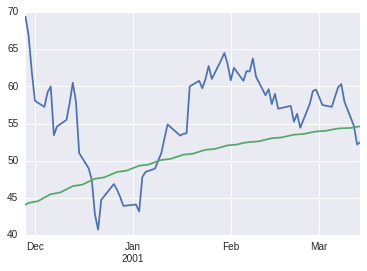

In [117]:
Oindex.plot()
Pindex.plot()

In [145]:
##pearsson correlation
olist = np.array((Oindex.tolist()))
plist = np.array((Pindex.tolist()))

sp.pearsonr(olist, plist)

(0.27845717653111629, 0.0036816532609986762)

In [149]:
error = [((x-y))**2 for x, y in zip(olist, plist)]
np.sqrt(np.sum(error)/Pindex.count())

7.8350086532643886

In [147]:
np.sqrt(mse(olist, plist))


7.8350086532643886